<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


- ### For the "Median value of owner-occupied homes" provide a boxplot

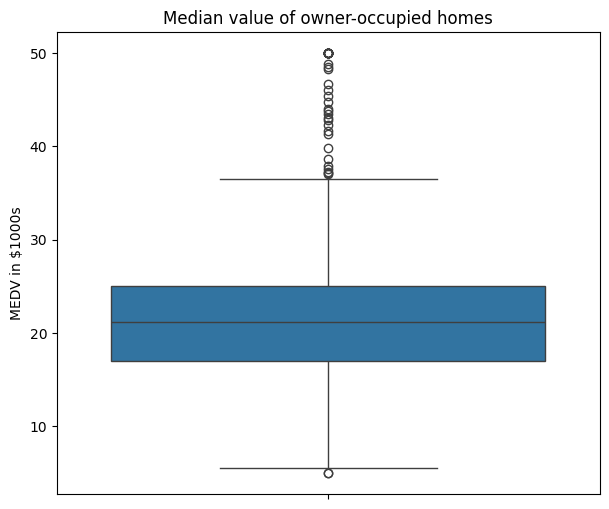

In [11]:
pyplot.figure(figsize=(7,6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel('MEDV in $1000s')
pyplot.show()

##### It shows the distribution of median house values in the dataset. The median value is just over 20 000 USD, and on the high end there is a significant number of outliers. The IQR is quite small, meaning that the middle 50% of the data is tightly collected around the median.

- ### Provide a  bar plot for the Charles river variable

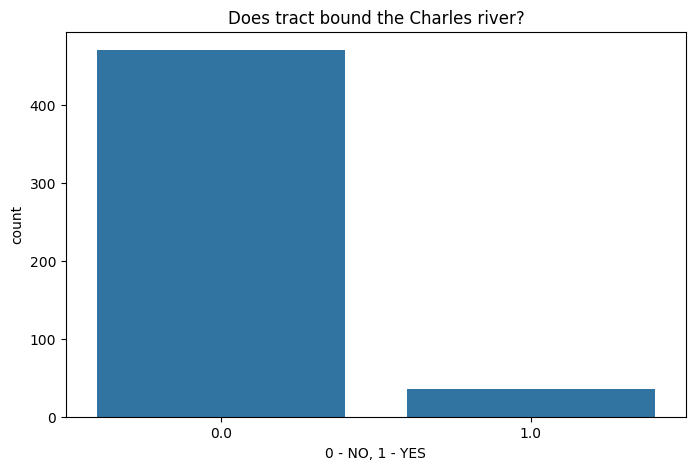

In [14]:
pyplot.figure(figsize=(8,5))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Does tract bound the Charles river?')
pyplot.xlabel('0 - NO, 1 - YES')
pyplot.show()

##### The barplot above shows that the vast majority of tracts does not border the Charles River

- ### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [17]:
# Discretising the age into three groups

boston_df['AGE'].max()

100.0

In [20]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

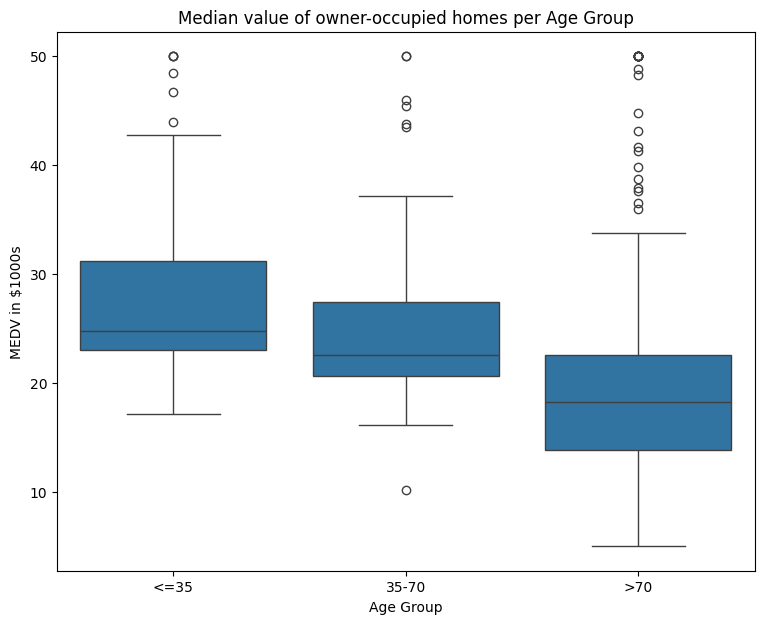

In [22]:
pyplot.figure(figsize=(9, 7))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title("Median value of owner-occupied homes per Age Group")
pyplot.ylabel('MEDV in $1000s')
pyplot.xlabel('Age Group')
pyplot.show()

##### The boxplots above show that the more new homes are in the areas, the higher median value of owner-occupied homes is

- ### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

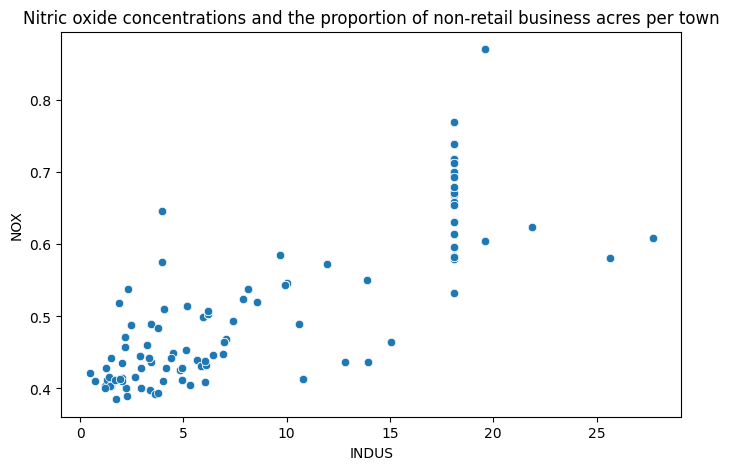

In [23]:
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title("Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.show()

##### The scatterplot above shows that when the proportion of non-retail business acress per town increases, the Nitric oxide concentration also increases. It can be said that the areas with more industrial land have higher air pollution

 - ### Create a histogram for the pupil to teacher ratio variable

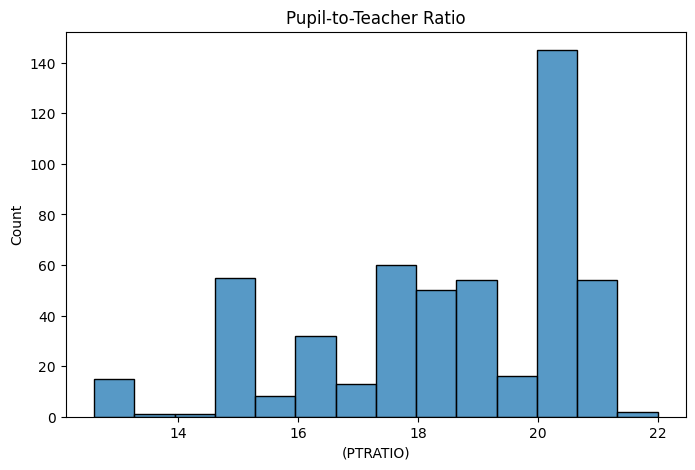

In [26]:
pyplot.figure(figsize=(8, 5))
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('Pupil-to-Teacher Ratio')
pyplot.xlabel('(PTRATIO)')
pyplot.show()

##### The scatterplot above shows that the most common pupil-to-teacher ratio is slightly above 20. It can mean that most areas have similar class size structure

 - ### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### H0: There is no significant difference in median value of houses bounded by the Charrles River
##### H1: There is a significant difference in median value of houses bounded by the Charrles River

##### α = 0.05

In [31]:
# checking if variances are equal

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [34]:
# since the p_value is less than 0.05 we assume the variances are not equal

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

##### As p_value is less than 0.05, there is a significant difference in median house values between houses bounded by the Charles River and those not bounded by the river. The null hypothesis has been rejcted

- ### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [36]:
boston_df['AGE_GROUP'].unique()

['35-70', '>70', '<=35']
Categories (3, object): ['<=35' < '35-70' < '>70']

In [37]:
#test for equality variance

scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [38]:
# since the p-value is greater than 0.05 we assume equality of variance

# creating variables for each group
thirty_five_lower = boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV']
thirty_five_seventy = boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### Since the p-value is less than 0.05 we can reject the null hypothesis as there is significant evidence there is a difference in median values of houses for each proportion of owner occupied units built prior to 1940

- ### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
##### H1: there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

##### α = 0.05

In [40]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### As the p-value is less than 0.05, we conclude that there is a relationship between NOX and INDUS. The null hypothesis is rejected.

- ### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [44]:
X = boston_df['DIS']  # independent variable
y = boston_df['MEDV'] # dependent variable

# adding constant to model (intercept)
X = sm.add_constant(X)

# fit regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        17:56:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### The impact of an additional unit of weighted distance to the five Boston employment centers on the median value of owner-occupied homes is an increase of around 1.09 units. This relationship is statistically significant, indicating a positive linear association between the distance and MEDV.

##### The p-value is less than 0.05, we can say there is a relationship between DIS and MEDV.